# Вопросы к первому семестру

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Статистики-распределений" data-toc-modified-id="Статистики-распределений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Статистики распределений</a></span></li><li><span><a href="#Многомерное-нормальное-распределение" data-toc-modified-id="Многомерное-нормальное-распределение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Многомерное нормальное распределение</a></span></li></ul></div>

In [5]:
# Imports
import numpy as np
import scipy.stats as stats
np.random.seed(42)

import matplotlib.pyplot as plt

In [6]:
# Styles
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [7]:
# import warnings
# warnings.filterwarnings('ignore')

---

## Статистики распределений

1. **Вопрос**: Дано нормальное распределение. Укажите моду, медиану и математическое ожидание. Что изменится, если добавить ещё одно, смещённое нормальное распределение?

In [8]:
N = int(2e5)
n_max, a = 2, 3
X1 = a*np.random.randint(0, n_max, N)
X2 = np.random.normal(loc=0, scale=1, size=N)

x = np.linspace(-3, 6, num=1001)
Y = np.zeros_like(x)
for i in range(0, n_max):
  Y += 1./n_max * stats.norm.pdf(x, loc=a*i, scale=1)

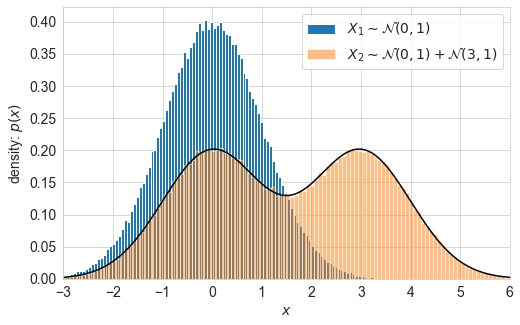

In [9]:
bins = 150
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
# plt.title('Одномерные нормальные распределения')
plt.hist(X2, bins=bins, density=True, label='$X_1 \sim \mathcal{{N}}(0,1)$')
plt.hist(X1+X2, bins=bins, density=True, alpha=0.5,
         label='$X_2 \sim \mathcal{{N}}(0,1) + \mathcal{{N}}(3,1)$')
plt.plot(x, Y, c='k')

plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.xlim([-3, 6])
plt.legend()
plt.show()

2. **Вопрос:** Пусть $\xi \sim \mathcal{{N}}(0,\sigma^2)$. Найти $\rho(\xi, \xi^n)$. \
   **Ответ:** $\rho = 0$ для чётных $n$ и $\rho = \dfrac{n!!}{\sqrt{(2n-1)!!}}$ для нечётных $n$.

---

## Многомерное нормальное распределение

1. **Вопрос:** Пусть случайный вектор $\xi$ имеет многомерное нормальное распределение $\mathcal{N}(\mu, \Sigma)$. Как вектор $\xi$ преобразовать в вектор $\eta$, состоящий из независимых стандартных нормальных случайных величин? \
   **Ответ:** $\eta = L^{-1} (\xi - \mu)$, где $\Sigma = L L^\top$.
   
1. **Вопрос:** Умножение на ортогональную матрицу, не меняет совместного распределения координат *стандартного нормального вектора*. А что можно с помощью поворота сделать с произвольным нормальным вектором? \
   **Ответ:** При повороте $Q$ матрица ковариаций $\Sigma$ преобразуется к виду $Q\Sigma Q^\top$. Однако симметричную положительно определённую матрицу можно ортогональными преобразованиями привести к диагональному виду. Вот почему любой нормальный вектор $\xi$ подходящим поворотом $\eta = Q \xi$ можно превратить в вектор с независимыми, но не обязательно одинаково распределёнными координатами.
   
1. **Вопрос:** Из некоррелированности случайных величин следует независимость? Привести контрпримеры. \
   **Ответ:** Случайные величины $\xi \sim \mathcal{N(0, 1)}$ и $\xi^2$ некоррелированы, но функционально зависимы. Почему пример не подходит?

4. **Вопрос:** Для двумерного нормального распределения нарисуем доверительные интервалы $\sigma$, $2\sigma$, $3\sigma$ двумя способами. Почему получились разные интервалы? Какой способ правильный? Что нужно изменить, чтобы результаты совпали (1 символ)? \
   **Ответ:** Красные линии неправильные, они показывают доверительные для одномерного Гаусса. Чтобы результаты совпали, нужно в первом способе взять $H_1$ (q = stats.chi2(1).ppf(ci)).

In [11]:
N = 1000
mu = np.array([0., 0.])
cov = np.array([[2.0, 0.3], [0.3, 0.5]])  # covariance matrix of x and y
data = stats.multivariate_normal.rvs(mu, cov, size=N, random_state=42)

In [75]:
from matplotlib.patches import Ellipse

def make_ellipse(mu, cov, ci=0.95, color='gray', label='$\pm 2\,\sigma$'):
    """Make covariance isoline"""
    e, v = np.linalg.eig(cov)
    angle = np.sign(v[1, 0]) * 180/np.pi * np.arccos(v[0, 0])
    q = stats.chi2(2).ppf(ci)
    e = Ellipse(mu, 2*np.sqrt(q*e[0]), 2*np.sqrt(q*e[1]), angle=angle,
                fill=False, color=color, label=label)
    return e

In [68]:
def get_std(cov):
    '''Get standard deviation'''
    theta = 2 * np.pi * np.linspace(0, 1, int(1e2))
    e, v = np.linalg.eig(cov)
    return v @ np.diag(e**0.5) @ np.array([np.cos(theta),np.sin(theta)])

In [71]:
def draw_data(data, mu, cov):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.plot(data[:,0], data[:,1], 'o', ms=2)
    for i, ci in enumerate([0.6827, 0.9545, 0.9973]):
        # variant 1
        e = make_ellipse(mu, cov, ci=ci)
        ax.add_artist(e)
        # variant 2
        std = get_std(cov)
        ax.plot(*(mu.reshape((2,1)) + (i+1)*std), 'r--')
    ax.plot(*mu, 'kx', ms=10, mew=2.)
#     ax.axis('equal')

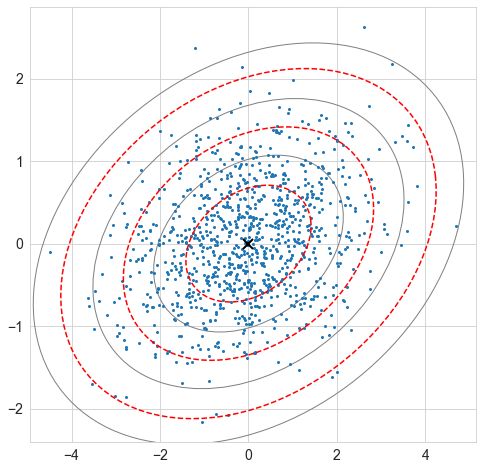

In [76]:
draw_data(data, mu, cov)

5. **Вопрос:** В одномерном случае в интервалы $\sigma$, $2\sigma$ и $3\sigma$ попадает 68.3, 95.4 и 99.7 % данных. А как обстоят дела в двумерном случае? Какой процент данных попадает в интервал $2\sigma$? \
   **Ответ:** Это вопрос по распределению $\chi^2$. В двумерном случае  в интервал $2\sigma$ попадает 86.5 % данных.

In [83]:
for i in np.arange(1,4):
    print(stats.chi2(2).cdf(i**2))

0.3934693402873665
0.8646647167633873
0.9888910034617577


---

## Условное математическое ожидание

1. **Вопрос:** Как связаны плотность условного распределения и сечение плотности совместного распределения? \
   **Ответ:** Плотность условного распределения является сечением плотности совместного распределения, отнормированным на соответствующее значение частного распределения.

In [ ]:
# pyx_section = np.empty_like(x_var)
# evidence = univariate_normal(y_condition, mean[1], Sigma_22)
# print(evidence)
# for i, x_i in enumerate(x_var):
#     xy_i = np.reshape([x_i, y_condition], (2, 1))
#     pyx_section[i] = 1./evidence * multivariate_normal(xy_i, d, mean_y, cov)